In [1]:
!rm -rf Eunomia
!git clone https://github.com/ouaguenouni/Eunomia
!pip install -r Eunomia/requirements.txt

Cloning into 'Eunomia'...
remote: Enumerating objects: 462, done.
remote: Counting objects: 100% (462/462), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 462 (delta 353), reused 407 (delta 298), pack-reused 0
Receiving objects: 100% (462/462), 2.92 MiB | 2.14 MiB/s, done.
Resolving deltas: 100% (353/353), done.


In [ ]:
import itertools
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from Eunomia.preferences import *
from Eunomia.additive_functions import *
from Eunomia.alternatives import *
from Eunomia.sampling import *
from Eunomia.mcmc import *
#from Eunomia.degree import *
from Eunomia.experiments import *
from Eunomia.ssb import * 
from Eunomia.graph_utils import * 

import torch
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm, trange
pyro.set_rng_seed(1)
import itertools
import random
import networkx as nx

def generate_directed_graph(vertices, p_edge):
    # Create a directed graph
    G = nx.DiGraph()
    G.add_nodes_from(vertices)
    # Add directed edges between these vertices with probability p_edge
    for i in range(len(vertices)):
        for j in range(i + 1, len(vertices)):
            if random.random() < p_edge:
                if random.choice([True, False]):
                    G.add_edge(vertices[i], vertices[j])
                else:
                    G.add_edge(vertices[j], vertices[i])

    return G

# Now G is a randomly sampled directed graph


In [ ]:
# Example usage
n = 3 # Maximum number in set F
k = 1
p_edge = 0.5  # Probability of creating an edge
theta = [tuple(i) for i in generate_additive_theta(n, k)]

In [53]:
graphs = {}
num_graphs = 50
cycle_counts = []
for _ in trange(num_graphs):
    G = generate_directed_graph(theta, p_edge=0.5)
    circuits = list(nx.simple_cycles(G))
    graphs[len(circuits)] = graphs.get(len(circuits), []) + [G.edges()]
    cycle_counts.append(len(circuits))

  0%|          | 0/50 [00:00<?, ?it/s]

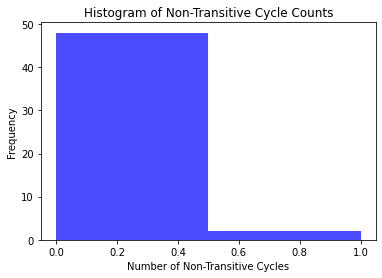

In [54]:
# Plotting the histogram of cycle counts
plt.hist(cycle_counts, bins=max(cycle_counts) - min(cycle_counts) + 1, alpha=0.7, color='blue')
plt.title('Histogram of Non-Transitive Cycle Counts')
plt.xlabel('Number of Non-Transitive Cycles')
plt.ylabel('Frequency')
plt.show()

In [55]:
data = {
    "n_cycles":[],
    "additive_acc":[],
    "nt_acc":[]
}
n_epochs = 200
lr=5e-1
m = 10000
lambda_1 = 0
lambda_2 = 0
for k in tqdm(sorted(graphs.keys())):
    L = []
    nb = 0
    #if len(graphs[k]) < m:
    #    continue
    for s in tqdm(graphs[k][:m]):
        model_map = SSBModel(theta)
        acc1 = fit_w_map(model_map, s, num_epochs=n_epochs,  lr=5e-2, lambda_1 = lambda_1)
        acc2 = fit_M_map(model_map, s, num_epochs=n_epochs, lr=5e-3, lambda_2 = lambda_2)
        acc = acc1 + acc2

        data["n_cycles"].append(k)
        data["additive_acc"].append(max(acc1))
        data["nt_acc"].append(max(acc2))
        L.append(max(acc2) - max(acc1))
    print(f"{k} - {np.array(L).mean()}")
    plt.plot(np.arange(len(acc)), acc)
    plt.show()

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

AttributeError: 'int' object has no attribute 'double'